In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math,time
import random 
import numpy.random as rd
from decimal import Decimal, ROUND_DOWN
from IPython import display
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib.backends.backend_pdf import PdfPages

np.set_printoptions(precision=3,suppress=True)

In [55]:

"""variable"""
N = 9 # number of individuals
D_weight = 1 # weight of distance
D_max = 0.01 # maximum effect of close neighbour
S_weight = 0.1 #weight of social affiliation
S_max = 0.01 # maximum effect of close social bond

intrinsic_p = 0.001 #probability to chage state sponteniously


itr = 500 #number of interation of simulation 




In [56]:

"""empty list for results"""
num_ind = np.array([])
phi_distance = np.array([])
soc_distance = np.array([])

def distance(X,Y):
    """function for calculate distance among individuals"""
    res = np.zeros((N,N))
    for i in range(N):
        xdis = X-X[i]
        ydis = Y-Y[i]
        r_dis = (xdis**2+ydis**2)**0.5
        res[i,:] = r_dis

    return res


def softmax(Z):
    """softmax fuction"""
    return np.exp(Z)/np.sum(np.exp(Z))

def calculate_switch_probability(c_dist,c_social,c_state):
    
    social_p = np.sum((S_max*np.exp(-S_weight*(1.0-c_social)))*c_state,axis=-1)
    distance_p = np.sum((D_max*np.exp(-D_weight*c_dist))*c_state,axis=-1)
    return social_p+distance_p+intrinsic_p

In [53]:
# """social affiliation"""
# soc_data = pd.read_csv('soc_mat.csv',sep=",")

# res_soc = soc_data.values
# res_soc = res_soc[:,1:10]
soc_sq = np.random.rand(N, N)
social = np.tril(soc_sq) + np.tril(soc_sq, -1).T
np.fill_diagonal(social,0)


In [54]:
state = np.zeros(shape=(N,)) ##iniitial state
depart = random.randint(0,N-1)  ## First departure
state[depart] = 1

"""distance"""
xpos = np.random.uniform(0,1,N)
ypos = np.random.uniform(0,1,N)

res_dist = distance(xpos,ypos)

np.sum((S_max*np.exp(-S_weight*(1.0-social))+D_max*np.exp(-D_weight*res_dist))*state,axis=-1)+a

array([0.016, 0.019, 0.02 , 0.015, 0.016, 0.016, 0.017, 0.018, 0.018])

In [44]:
res_dist

array([[0.   , 0.448, 0.325, 0.302, 0.555, 0.431, 0.174, 0.433, 0.11 ],
       [0.448, 0.   , 0.744, 0.713, 0.149, 0.16 , 0.485, 0.698, 0.397],
       [0.325, 0.744, 0.   , 0.354, 0.868, 0.679, 0.271, 0.612, 0.428],
       [0.302, 0.713, 0.354, 0.   , 0.788, 0.726, 0.427, 0.271, 0.316],
       [0.555, 0.149, 0.868, 0.788, 0.   , 0.302, 0.619, 0.722, 0.483],
       [0.431, 0.16 , 0.679, 0.726, 0.302, 0.   , 0.408, 0.769, 0.42 ],
       [0.174, 0.485, 0.271, 0.427, 0.619, 0.408, 0.   , 0.602, 0.274],
       [0.433, 0.698, 0.612, 0.271, 0.722, 0.769, 0.602, 0.   , 0.369],
       [0.11 , 0.397, 0.428, 0.316, 0.483, 0.42 , 0.274, 0.369, 0.   ]])

In [66]:


#xsoc = np.random.uniform(0,20,N)
#ysoc = np.random.uniform(0,20,N)

#res_soc = np.zeros(shape=(N,N))

#res_soc = distance(xsoc,ysoc)

results = np.zeros((N,itr))
"""simulation"""
#stdsc = StandardScaler()
mmsc = MinMaxScaler()

for t in range(itr):
    """initial condition"""
    state = np.zeros(shape=(N,)) ##iniitial state
    depart = np.random.randint(0,N)  ## First departure
    state[depart] = 1
    
    counter=0
    
    results[counter,t]=depart
    counter+=1
 
    """distance"""
    xpos = np.random.uniform(0,1,N)
    ypos = np.random.uniform(0,1,N)

    res_dist = distance(xpos,ypos)
    
    
    while np.sum(state)<N:
    
    
        trans_prob = calculate_switch_probability(res_dist,social,state)  #calculate probaility to change state
        
        depart = np.random.randint(0,N)
        
        if np.random.uniform()<trans_prob[depart]:
            if not state[depart]:
                state[depart]=1
                results[counter,t]=depart
                counter+=1
            

#         prob = np.reshape(prob,(1,N))
#         prob = prob[0,:]
#         Next = rd.choice(N, 1, p=prob) #select next one from the probalitiy 
#         state[Next,0] = 0 #change state


#         xT = np.reshape(xpos,(N,1))  
#         yT = np.reshape(ypos,(N,1))

#         xnew = xT*state #following state, indivi
#         ynew = yT*state

#         #show plot of each individual's state 
#         #plt.clf()
#         #plt.scatter(xpos,ypos,c="blue", s=50) #blue is departed individuals
#         #plt.scatter(xnew,ynew,c="red", s=50) #red is undeparted individuals 
#         #display.display(plt.gcf())
#         #display.clear_output(wait=True)

#         sum_ind_state = N - np.sum(state)
#         num_ind = np.append(num_ind,sum_ind_state) 
#         phi_dist = res_dist[pre_ind,Next]
#         phi_distance = np.append(phi_distance,phi_dist)
#         soc_dist = res_soc[pre_ind,Next]
#         soc_distance = np.append(soc_distance,soc_dist)
    


In [67]:
results[:,0]

array([0., 2., 4., 5., 3., 1., 6., 7., 8.])

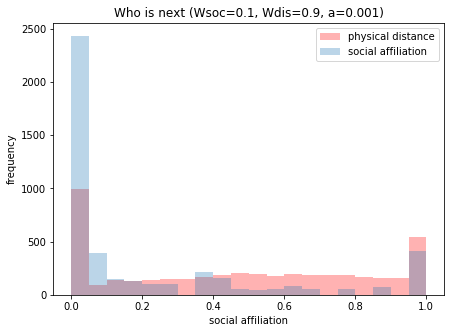

In [5]:
xx = range(itr*N)

fig = plt.figure(figsize=(7,5))
plt.hist(phi_distance,bins=20,color="red",alpha=0.3)
plt.xlabel("physical distance")
plt.ylabel("frequency")

plt.hist(soc_distance,bins=20,alpha=0.3)
plt.xlabel("social affiliation")
plt.ylabel("frequency")
#plt.show()
plt.legend(['physical distance','social affiliation'])
plt.title("Who is next (Wsoc=0.1, Wdis=0.9, a=0.001)")
#plt.show()

plt.savefig("result.png",dpi=300)


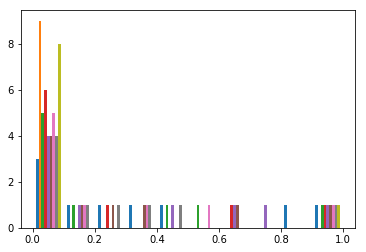

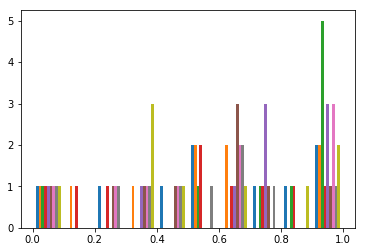

In [173]:
plt.hist(res_soc)
plt.show()
plt.hist(res_dist)
plt.show()

In [59]:
np.random.uniform()

0.8514206605358232